In [9]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from nrclex import NRCLex
from gensim.models import Word2Vec
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to C:\Users\Anmol
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Anmol
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Anmol
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Anmol
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
import re
with open('output.txt', 'r') as f:
    text = f.read()
    string = str(text)


Divide the Script into Scenes

In [25]:
# read csv file and convert to dataframe and print first 5 rows
def read_csv_file():
    df = pd.read_csv('movie_scripts_new.csv', encoding='utf-8')
    return df
movies = read_csv_file()

In [26]:
def arr_scence(string):
    arr = [string.start() for string in re.finditer('INT.', string)]
    arr = arr + [string.start() for string in re.finditer('EXT.', string)]
    arr.sort()
    scene = []
    for i in range(0,len(arr)):
        if i == 0:
            scene.append(string[0:arr[i]])
        else:
            scene.append(string[arr[i-1]:arr[i]])

    return scene

1175

Cleaning the script


In [43]:

moviesCleaned = []

x = len(movies)
for i in range(0, 30):
    token_arr = []
    for scene in arr_scence(str(movies['script'][i])):
        text = re.sub(r'\[[0-9]*\]', ' ', scene)
        text = re.sub(r'\s+', ' ', text)
        text = text.lower()
        text = re.sub(r'\d', ' ', text)
        text = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', text)
        text = re.sub('\W+',' ', text )
        text = word_tokenize(text)
        scene = []
        for word in text:
            if word not in stopwords.words('english'):
                scene.append(word)
                
        token_arr.append(scene)
    moviesCleaned.append(token_arr)

In [49]:
print(moviesCleaned[0][0])

['quentin', 'tarantino', 'october', 'movie', 'dedicated', 'following', 'source', 'inspiration', 'timothy', 'carey', 'roger', 'corman', 'andre', 'detoth', 'chow', 'yuen', 'fat', 'jean', 'luc', 'goddard', 'jean', 'pierre', 'melville', 'lawrence', 'tierney', 'lionel', 'white', 'reservoir', 'dog']


Lemmatization

In [50]:
movieCount = 30
def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    for word in words:
        lemmatized_words.append(lemmatizer.lemmatize(word))
    return lemmatized_words
for i in range(0, movieCount):
    token_arr2 = []
    for token in moviesCleaned[i]:
        token_arr2.append(lemmatize_words(token))
        
    moviesCleaned[i] = token_arr2
    
    

In [51]:
print(moviesCleaned[0][0])

['quentin', 'tarantino', 'october', 'movie', 'dedicated', 'following', 'source', 'inspiration', 'timothy', 'carey', 'roger', 'corman', 'andre', 'detoth', 'chow', 'yuen', 'fat', 'jean', 'luc', 'goddard', 'jean', 'pierre', 'melville', 'lawrence', 'tierney', 'lionel', 'white', 'reservoir', 'dog']


Stemming

In [52]:
def stem_words(words):
    stemmer = PorterStemmer()
    stemmed_words = []
    for word in words:
        stemmed_words.append(stemmer.stem(word))
    return stemmed_words
dicts = []
for i in range(0, movieCount):
    token_arr2 = []
    for token in moviesCleaned[i]:
        token = stem_words(token)
        token_arr2.append(token)
    moviesCleaned[i] = token_arr2

    token_dictionary = {}
    i=1
    for token in moviesCleaned[i]:
        for word in token:
            if word not in token_dictionary:
                token_dictionary[word] = i
                i+=1
    dicts.append(token_dictionary)

In [53]:
print(dicts[0])

{'script': 1, 'cut': 2, 'black': 3, 'title': 4, 'fin': 5, 'exterior': 6, 'la': 7, 'day': 8, 'red': 9, 'chevy': 10, 'impala': 11, 'convertible': 12, 'driving': 13, 'somewhere': 14, 'west': 15, 'car': 16, 'pas': 17, 'going': 18, 'way': 19, 'place': 20, 'los': 21, 'angeles': 22, 'music': 23, 'shadowy': 24, 'men': 25, 'planet': 26, 'good': 27, 'cop': 28, 'bad': 29, 'pov': 30, 'freeway': 31, 'rain': 32, 'people': 33, 'umbrella': 34, 'standing': 35, 'corner': 36, 'walking': 37, 'bridge': 38, 'walk': 39, 'across': 40, 'downtown': 41, 'intersection': 42, 'bus': 43, 'background': 44, 'shadow': 45, 'pavement': 46, 'river': 47, 'wide': 48, 'medium': 49, 'close': 50, 'see': 51, 'graffiti': 52, 'swamped': 53, 'high': 54, 'water': 55, 'large': 56, 'man': 57, 'hear': 58, 'thunder': 59, 'stop': 60, 'first': 61, 'woman': 62, 'one': 63, 'year': 64, 'lived': 65, 'earthquake': 66, 'fire': 67, 'flood': 68, 'second': 69, 'keep': 70, 'coming': 71, 'hillside': 72, 'get': 73, 'work': 74, 'mess': 75, 'wind': 76

Creating and padding Sequences

In [55]:
movieSequences = []
for i in range(0,movieCount):
    sequences = []
    for token in moviesCleaned[i]:
        sequences.append([dicts[i][word] for word in token])
    movieSequences.append(sequences)
    
    
    


#padding of sequences
def pad_sequences(sequences):
    max_length = max([len(seq) for seq in sequences])
    padded_sequences = []
    for seq in sequences:
        while len(seq) < max_length:
            seq.append(0)
        padded_sequences.append(seq)
    return padded_sequences
for i in range(0, movieCount):
    movieSequences[i] = pad_sequences(movieSequences[i])


KeyError: 'quentin'

In [57]:
for i in range(0, movieCount):
    token_arr=moviesCleaned[i]
    for token in token_arr:
        for word in token:
            if word not in dicts[i]:
                dicts[i][word] = 0
        joined = ' '.join(token)
        token_arr[token_arr.index(token)] = joined
    moviesCleaned[i] = token_arr

In [59]:
print(moviesCleaned[0][0][0])

q


Finding the compound Scores of each scene

In [61]:
compoundScores = []
for i in range(0, movieCount):
    compound = []
    obj  = SentimentIntensityAnalyzer()
    for line in moviesCleaned[i]:
        sentiment  = obj.polarity_scores(line)
        # print(sentiment['compound'])
        compound.append(sentiment['compound'])
    compoundScores.append(compound)
    

In [74]:
# minimun length of arrays in compoundScores 
def min_length(arr):
    min = len(arr[0])
    for i in range(0, len(arr)):
        if len(arr[i]) < min:
            min = len(arr[i])
    return min
print(min_length(compoundScores))

0


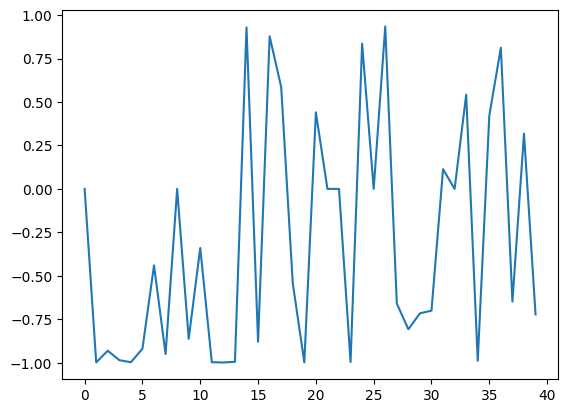

In [72]:
def plot_graph(compoundScores):
    plt.plot(compoundScores)
    plt.show()

plot_graph(compoundScores[0][:40])

In [96]:

compoundScores2 =[]
import numpy as np

for x in compoundScores:
    if(len(x)!=0):
        compoundScores2.append(x)

for c in compoundScores2:
    c=c[:27]
    for i in c:
        i = i*100

n = compoundScores[0][:27]
print(n)

def find_similar_row(array, n):
    # find the difference between n and each row in array
    # find the sum of the difference
    # find the row with the lowest sum of difference
    # return the row
    # return array[np.argmin(np.sum(np.abs(array - n), axis=1))]
    return array[np.argmax(np.dot(n, array)/(np.linalg.norm(array)*np.linalg.norm(n)))]

# find_similar_row(compoundScores2, n)

[0.0, -0.9981, -0.931, -0.9855, -0.9972, -0.9194, -0.4404, -0.9501, 0.0, -0.8625, -0.34, -0.9972, -0.9986, -0.9948, 0.9287, -0.8795, 0.8779, 0.5859, -0.5423, -0.9983, 0.4404, 0.0, 0.0, -0.9962, 0.836, 0.0, 0.9345]
